In [1]:
#import package
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


# 1. Import des données
- les données sont splitée en 2 dataset nous allons les réunir puis splitée nous même

In [4]:
d1=pd.read_csv('churn-bigml-20.csv',sep=',')
d2=pd.read_csv('churn-bigml-80.csv',sep=',')

df=pd.concat([d1,d2])

# 2. EDA 

In [6]:
# visualitation des données

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [16]:
# quelques infos sur les données

print("il y a" + " " + str(df.columns.value_counts().sum()) + " colonnes")



il y a 20 colonnes


In [17]:
# quelques infos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [18]:
# taux de valeurs manquantes par variables 

print(" le taux de valeurs manquantes par variables:")
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

 le taux de valeurs manquantes par variables:


State                     0.0
Total intl charge         0.0
Total intl calls          0.0
Total intl minutes        0.0
Total night charge        0.0
Total night calls         0.0
Total night minutes       0.0
Total eve charge          0.0
Total eve calls           0.0
Total eve minutes         0.0
Total day charge          0.0
Total day calls           0.0
Total day minutes         0.0
Number vmail messages     0.0
Voice mail plan           0.0
International plan        0.0
Area code                 0.0
Account length            0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

In [27]:
# on observe la variable cible

print("Le taux de churn est :")

df['Churn'].value_counts(normalize=True)



Le taux de churn est :


False    0.855086
True     0.144914
Name: Churn, dtype: float64

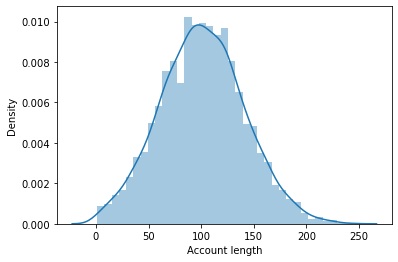

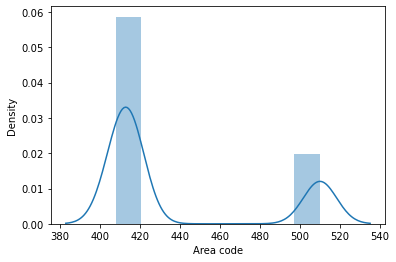

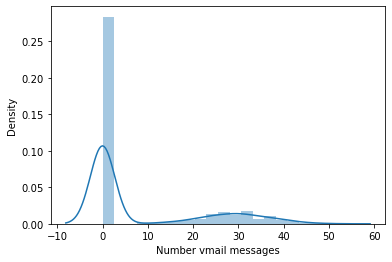

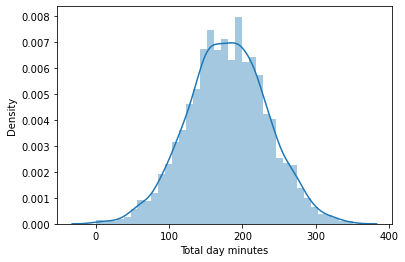

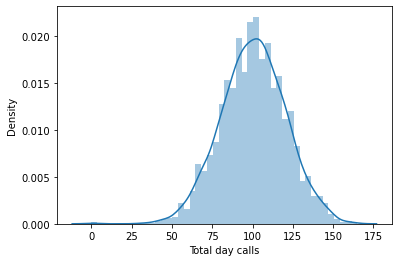

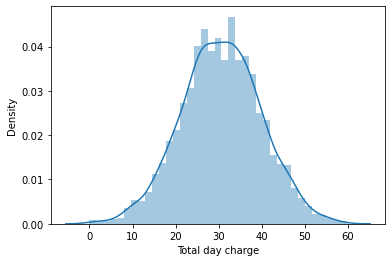

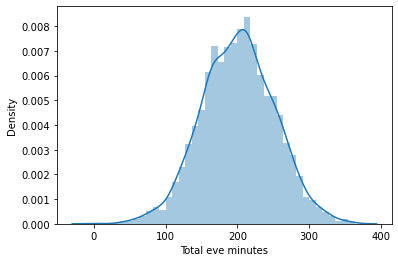

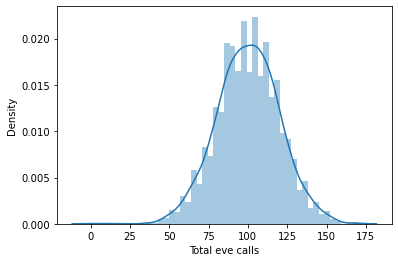

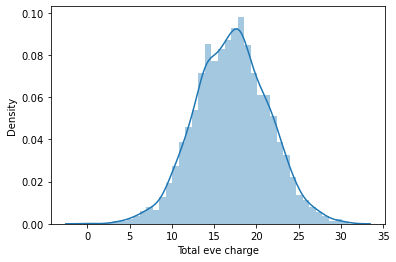

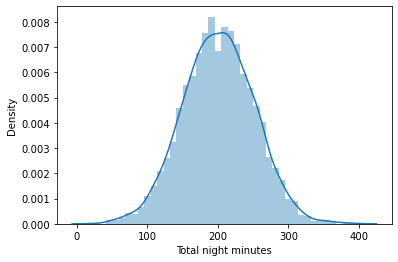

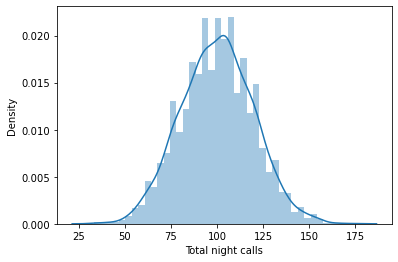

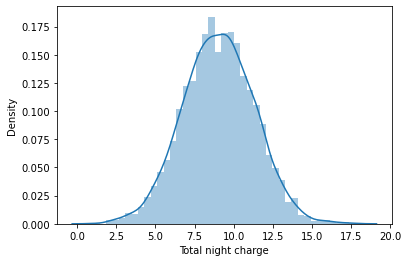

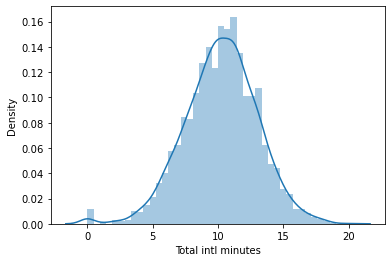

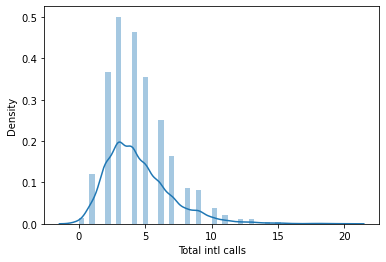

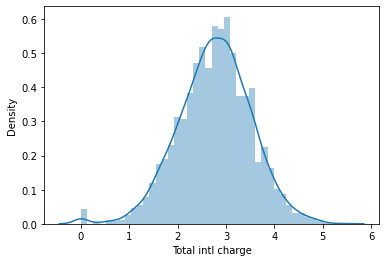

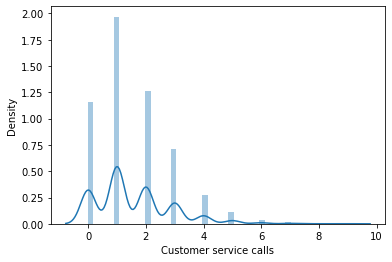

In [42]:
# on observe les variables continue

# les variables semblent suivre une distribution normale

for col in df.select_dtypes(['float','int64']):
    plt.figure()
    sns.distplot(df[col])

In [40]:
# variables qualitatives

for col in df.select_dtypes(['object','bool']):
    print(f'{col :-<50} {df[col].unique()}')

State--------------------------------------------- ['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']
International plan-------------------------------- ['No' 'Yes']
Voice mail plan----------------------------------- ['No' 'Yes']
Churn--------------------------------------------- [False  True]


In [46]:
#observons les relation des variables avec la variable cible => Churn

chur_positive= df[(df['Churn']==True)]

chur_negatif= df[(df['Churn']==False)]

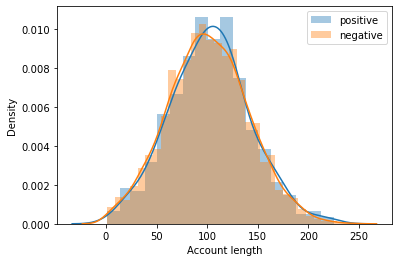

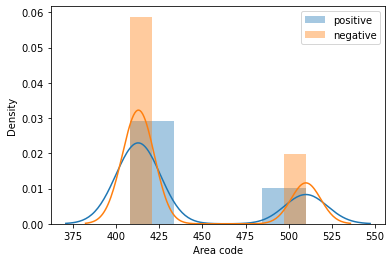

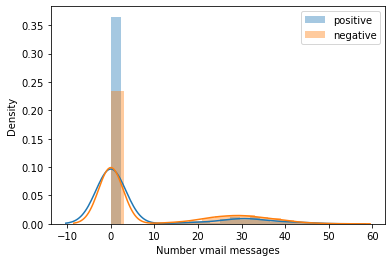

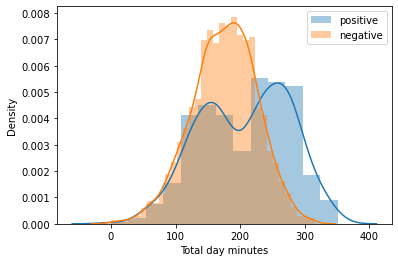

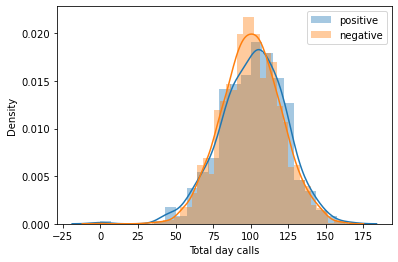

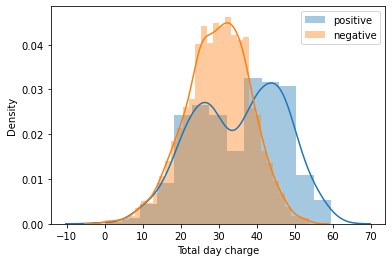

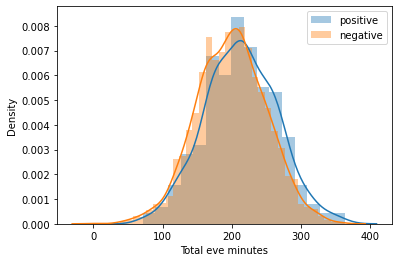

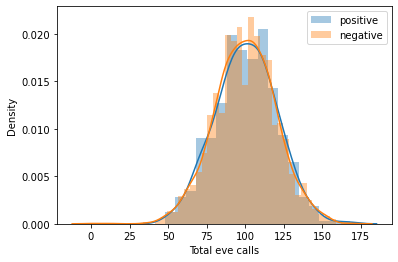

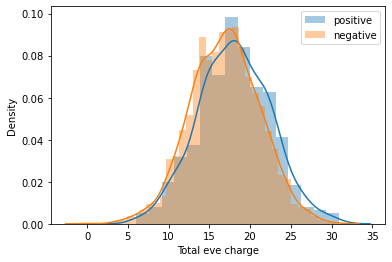

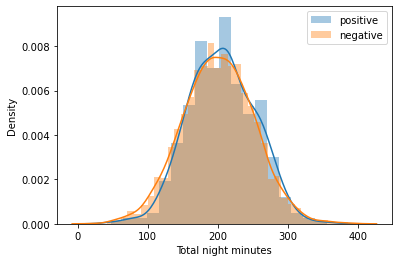

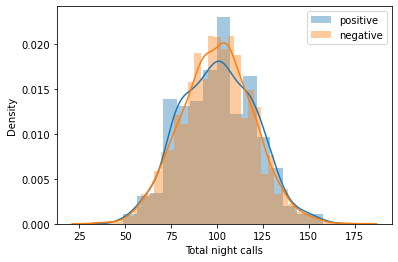

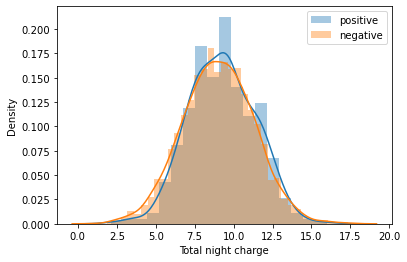

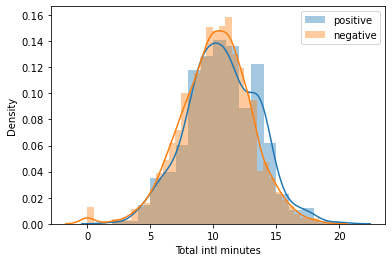

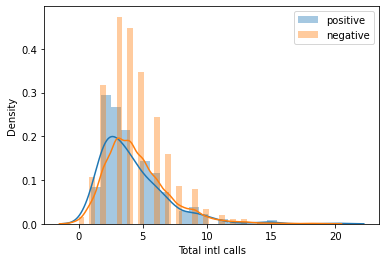

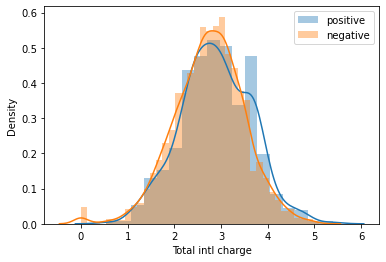

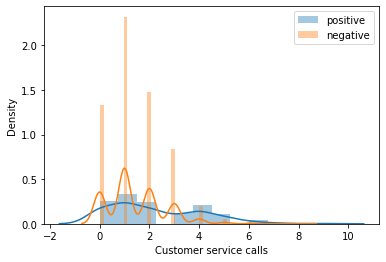

In [53]:
for col in df.select_dtypes(exclude=['bool','object']):
    plt.figure()
    sns.distplot(chur_positive[col], label='positive')
    sns.distplot(chur_negatif[col], label='negative')
    plt.legend()

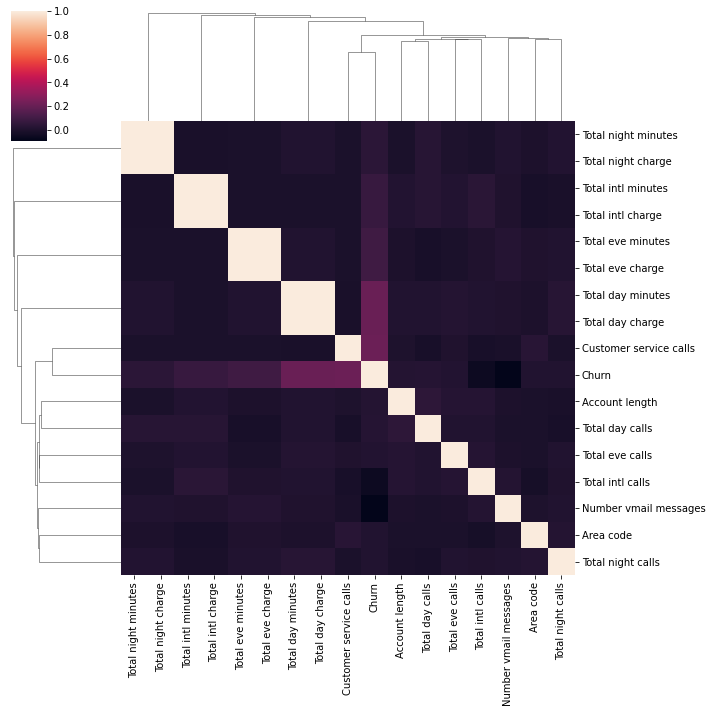

In [56]:
#matrice de correlation des variables

sns.clustermap(df.corr())

In [58]:
# plus précisement 

df.corr()['Churn'].sort_values()

Number vmail messages    -0.089728
Total intl calls         -0.052844
Total night calls         0.006141
Area code                 0.006174
Total eve calls           0.009233
Account length            0.016541
Total day calls           0.018459
Total night minutes       0.035493
Total night charge        0.035496
Total intl minutes        0.068239
Total intl charge         0.068259
Total eve charge          0.092786
Total eve minutes         0.092796
Total day charge          0.205151
Total day minutes         0.205151
Customer service calls    0.208750
Churn                     1.000000
Name: Churn, dtype: float64

<Figure size 432x288 with 0 Axes>

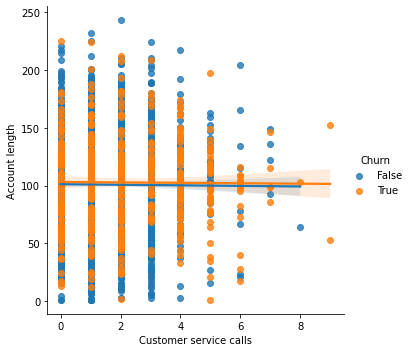

<Figure size 432x288 with 0 Axes>

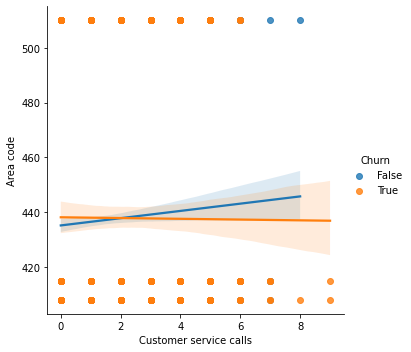

<Figure size 432x288 with 0 Axes>

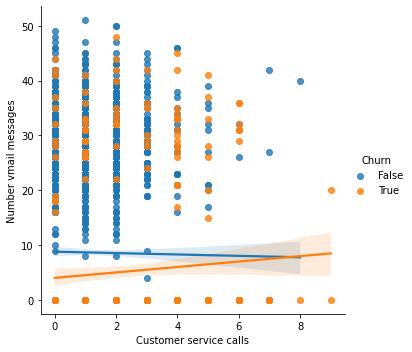

<Figure size 432x288 with 0 Axes>

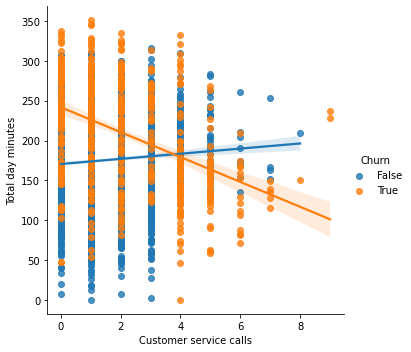

<Figure size 432x288 with 0 Axes>

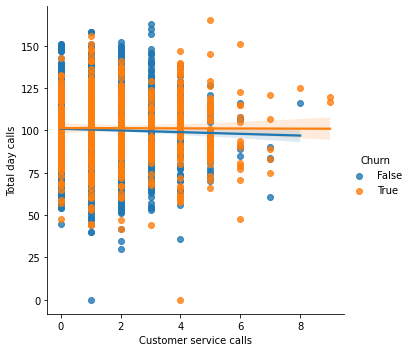

<Figure size 432x288 with 0 Axes>

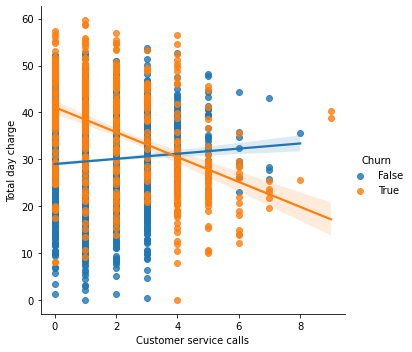

<Figure size 432x288 with 0 Axes>

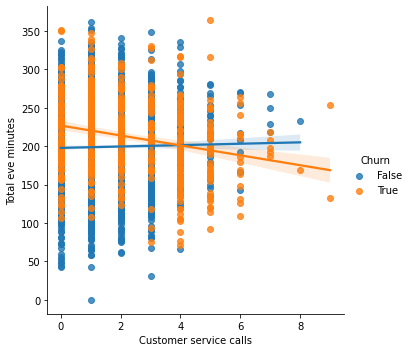

<Figure size 432x288 with 0 Axes>

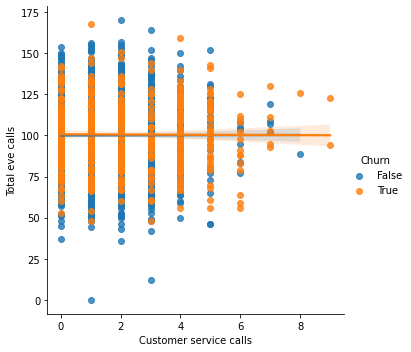

<Figure size 432x288 with 0 Axes>

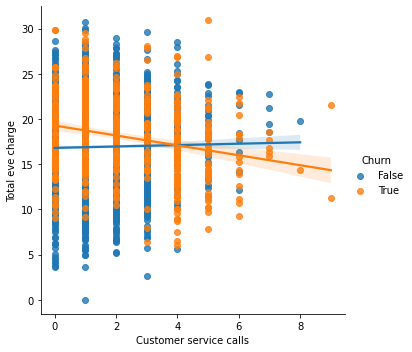

<Figure size 432x288 with 0 Axes>

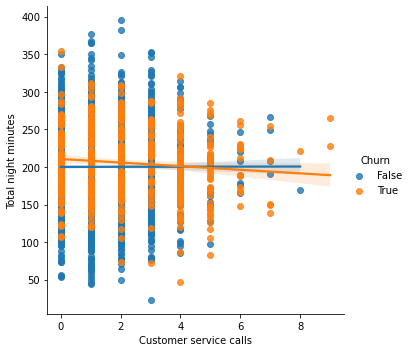

<Figure size 432x288 with 0 Axes>

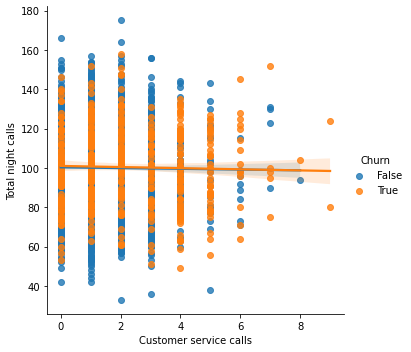

<Figure size 432x288 with 0 Axes>

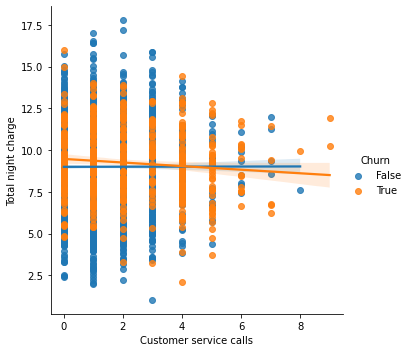

<Figure size 432x288 with 0 Axes>

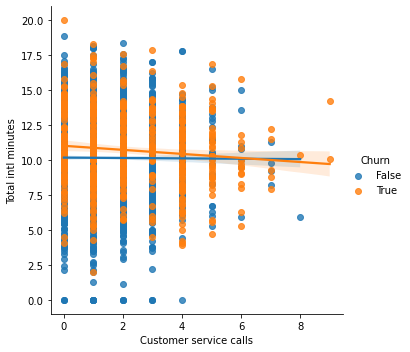

<Figure size 432x288 with 0 Axes>

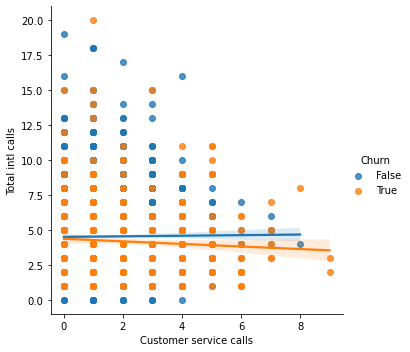

<Figure size 432x288 with 0 Axes>

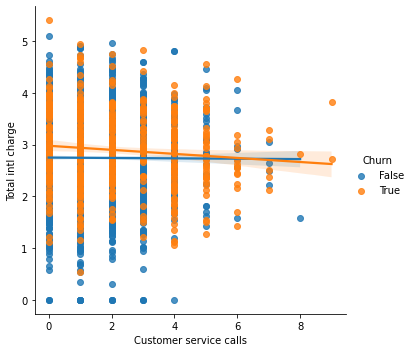

<Figure size 432x288 with 0 Axes>

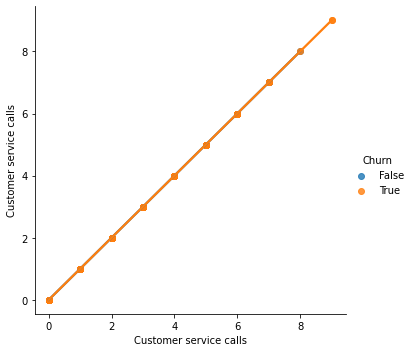

In [57]:
# on observe les relations entre la target et la variable de contact service client avec le reste des variables

for col in df.select_dtypes(exclude=['bool','object']):
    plt.figure()
    sns.lmplot(x='Customer service calls', y=col, hue='Churn', data=df)

In [59]:
# T-Test

from scipy.stats import ttest_ind


def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(chur_negatif[col].dropna(), chur_positive[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

### hypotheses nulle (H0): 

- HA: Les individus qui ont churner ont des taux significativement différents

- H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs


In [62]:
for col in df.select_dtypes(['float','int64']):
    print(f'{col :-<50} {t_test(col)}')

Account length------------------------------------ 0
Area code----------------------------------------- 0
Number vmail messages----------------------------- H0 Rejetée
Total day minutes--------------------------------- H0 Rejetée
Total day calls----------------------------------- 0
Total day charge---------------------------------- H0 Rejetée
Total eve minutes--------------------------------- H0 Rejetée
Total eve calls----------------------------------- 0
Total eve charge---------------------------------- H0 Rejetée
Total night minutes------------------------------- 0
Total night calls--------------------------------- 0
Total night charge-------------------------------- 0
Total intl minutes-------------------------------- H0 Rejetée
Total intl calls---------------------------------- H0 Rejetée
Total intl charge--------------------------------- H0 Rejetée
Customer service calls---------------------------- H0 Rejetée


# 3. PREPROCESSING

In [82]:
#convertir la variable en numérique

df['Churn'].replace(to_replace=True, value=1, inplace=True)
df['Churn'].replace(to_replace=False,  value=0, inplace=True)

y = df['Churn']

X = df.drop(columns = ['Churn','Area code'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [83]:
# création de pipeline pour traiter indépendamment les variables categorielle et les variables de type numérique

from sklearn.pipeline import Pipeline

numerical_features=X.select_dtypes(exclude=['object']).columns.to_list()

categorical_features=X.select_dtypes('object').columns.to_list()

numerical_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.865
Test set accuracy score for best params: 0.859 
[[696  31]
 [ 87  20]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       727
           1       0.39      0.19      0.25       107

    accuracy                           0.86       834
   macro avg       0.64      0.57      0.59       834
weighted avg       0.83      0.86      0.84       834


Estimator: Random Forest
Best params are : {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.925
Test set accuracy score for best params: 0.940 
[[723   4]
 [ 46  61]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       727
           1       0.94      0.57      0.71       107

    accuracy                   

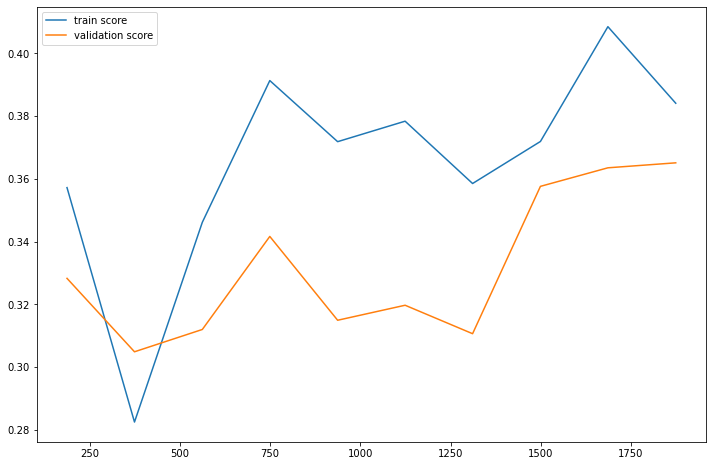

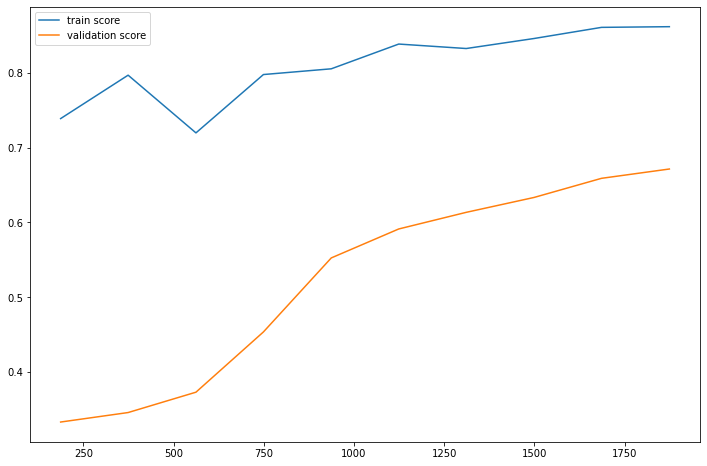

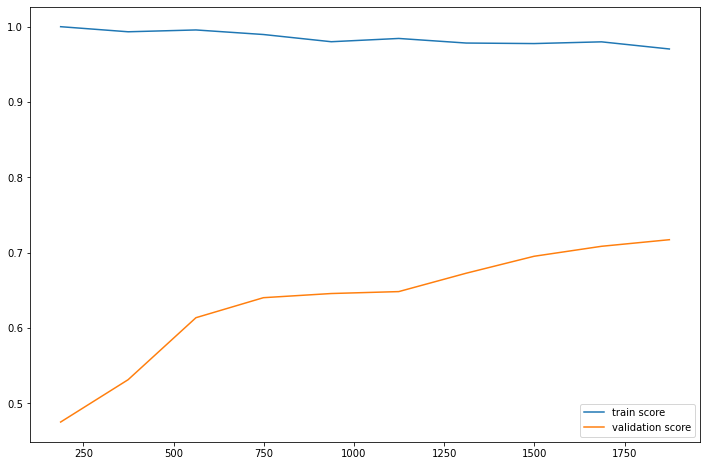

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

pipe_lr = Pipeline([('preprocess',preprocessor),
 ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('preprocess',preprocessor),
('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('preprocess',preprocessor),
('clf', svm.SVC(random_state=42))])

# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)


SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)



# List of pipelines for iterating through each of them
grids = [LR,RF,SVM]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'Support Vector Machine'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(gs, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


In [88]:
# on teste un xgboost

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from xgboost import XGBClassifier

model = make_pipeline(preprocessor, XGBClassifier())
model.fit(X_train, y_train)
model.score(X_test, y_test)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

[11:59:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       727
           1       0.88      0.79      0.83       107

    accuracy                           0.96       834
   macro avg       0.92      0.88      0.90       834
weighted avg       0.96      0.96      0.96       834



In [128]:
import warnings
warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

params = { 
    'clf__max_depth': [3, 4, 5, 6, 8],
    "clf__gamma":[0, 0.25, 0.5, 0.75,1],
    'clf__n_estimators': [300],
    "clf__subsample":[0.9],
    "clf__colsample_bytree":[0.5],
    "clf__early_stopping_rounds": [10]
}

pipe_xgb = Pipeline([('preprocess',preprocessor),
('clf', XGBClassifier(silent=True))])



grid = GridSearchCV(
    estimator = pipe_xgb,
    param_grid = params,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 4,
    verbose = 0,
)

# Model fitting
grid = grid.fit(X_train, y_train)



/Users/rayanehalilou/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/rayanehalilou/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/rayanehalilou/opt/anaconda3/lib/python3.9/sit

In [127]:
grid.score(X_test,y_test)

preds = grid.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.86      0.79      0.82       107

    accuracy                           0.96       834
   macro avg       0.91      0.88      0.90       834
weighted avg       0.95      0.96      0.95       834

